# Anatomy of a Circuit

In [1]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

## Nodes

A **node** is any point in a circuit that connects two or more elements. The voltage at all points on the node is constant.

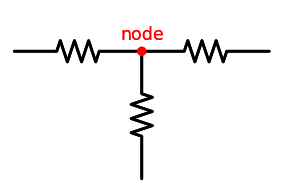

In [2]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='anatomy-node.svg') as d:
    d += elm.Resistor().right()
    d += elm.Dot().label('node').color('red')
    d.push()
    d += elm.Resistor().down()
    d.pop()
    d += elm.Resistor().right()

```{figure} anatomy-node.svg
---
height: 250px
name: anatomy-node
---
Example of a node.
```

## Branches

A **branch** is any circuit element connecting two nodes.

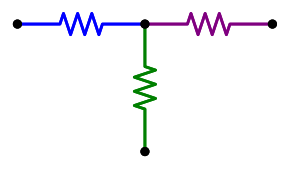

In [3]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='anatomy-branch.svg') as d:
    d += elm.Dot()
    d += elm.Resistor().right().color('blue')
    d += elm.Dot()
    d.push()
    d += elm.Resistor().down().color('green')
    d += elm.Dot()
    d.pop()
    d += elm.Resistor().right().color('purple')
    d += elm.Dot()

```{figure} anatomy-branch.svg
---
height: 250px
name: anatomy-branch
---
Example of three different branches.
```

## Loops

A **loop** is any closed path in a circuit. _Closed_ means that it begins and ends at the same node.

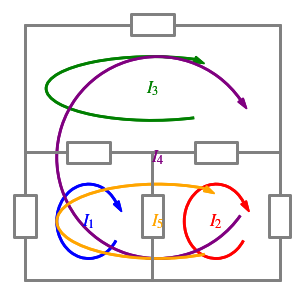

In [4]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='anatomy-loop.svg') as d:
    d += (R1 := elm.RBox().up().color('gray'))
    d += (R2 := elm.RBox().right().color('gray'))
    d += (R3 := elm.RBox().right().color('gray'))
    d += (R4 := elm.RBox().down().color('gray'))
    d += (R5 := elm.RBox().down().at(R2.end).color('gray'))
    d += (LB := elm.Line().at(R1.start).right().tox(R4.end).color('gray'))
    d += (LL := elm.Line().at(R1.end).up().color('gray'))
    d += elm.Line().right().tox(R2.center).color('gray')
    d += (R6 := elm.RBox().right().color('gray'))
    d += elm.Line().right().tox(R4.end).color('gray')
    d += (LR := elm.Line().down().toy(R4.start).color('gray'))
    d += elm.LoopCurrent([R2,R5,LB,R1],pad=0.5).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,R4,LB,R5],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R6,LR,R2,LL],pad=0.5).label('$I_3$').color('green')
    d += elm.LoopCurrent([R6,LR,LB,R1],pad=0.5).label('$I_4$').color('purple')
    d += elm.LoopCurrent([R2,LR,LB,R1],pad=0.5).label('$I_5$').color('orange')

```{figure} anatomy-loop.svg
---
height: 250px
name: anatomy-loop
---
Five different loops.
```

## Meshes

A **mesh** is a loop with no intermediate branches.

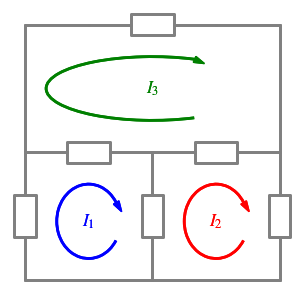

In [5]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='anatomy-mesh.svg') as d:
    d += (R1 := elm.RBox().up().color('gray'))
    d += (R2 := elm.RBox().right().color('gray'))
    d += (R3 := elm.RBox().right().color('gray'))
    d += (R4 := elm.RBox().down().color('gray'))
    d += (R5 := elm.RBox().down().at(R2.end).color('gray'))
    d += (LB := elm.Line().at(R1.start).right().tox(R4.end).color('gray'))
    d += (LL := elm.Line().at(R1.end).up().color('gray'))
    d += elm.Line().right().tox(R2.center).color('gray')
    d += (R6 := elm.RBox().right().color('gray'))
    d += elm.Line().right().tox(R4.end).color('gray')
    d += (LR := elm.Line().down().toy(R4.start).color('gray'))
    d += elm.LoopCurrent([R2,R5,LB,R1],pad=0.5).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,R4,LB,R5],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R6,LR,R2,LL],pad=0.5).label('$I_3$').color('green')

```{figure} anatomy-mesh.svg
---
height: 250px
name: anatomy-mesh
---
Only $I_1$, $I_2$, and $I_3$ are meshes.
```